## Plan:

- Get rid of unnecessary columns 

- Create a final df to use for model building

- Feature engineering

- Model Building using linear regression, lasso regression, random forest

- Model tuning using GridSearch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data_cleaned.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Age,python_yn,rstudio_yn,SQL_yn,spark_yn,aws_yn,job_simp,seniority,job_desc,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000 employees,1973,...,48,1,0,0,0,0,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,37,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000 employees,2010,...,11,1,0,1,1,0,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000 employees,1965,...,56,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200 employees,1998,...,23,1,0,1,0,0,data scientist,na,2728,3


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'States', 'same_state', 'Age', 'python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_desc', 'num_comp'],
      dtype='object')

In [48]:
df["Industry"].astype("str")
df["Sector"].astype("str")

0               Aerospace & Defense
1                       Health Care
2                 Business Services
3      Oil, Gas, Energy & Utilities
4                 Business Services
                   ...             
737       Biotech & Pharmaceuticals
738          Information Technology
739                       Education
740               Business Services
741                      Government
Name: Sector, Length: 742, dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  Employer Provided  742 non

In [61]:
df_model=df[['Rating','hourly',"Size","Type of ownership","Revenue",'Employer Provided','States','same_state', 'python_yn',
       'rstudio_yn', 'SQL_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_desc', 'num_comp','avg_salary']]
df_model.head()

,Rating,hourly,Size,Type of ownership,Revenue,Employer Provided,States,same_state,python_yn,rstudio_yn,SQL_yn,spark_yn,aws_yn,job_simp,seniority,job_desc,num_comp,avg_salary
0,3.8,0,501 - 1000 employees,Company - Private,$50 to $100 million (USD),0,NM,0,1,0,0,0,0,data scientist,na,2536,0,72.0
1,3.4,0,10000+ employees,Other Organization,$2 to $5 billion (USD),0,MD,0,1,0,0,0,0,data scientist,na,4783,0,87.5
2,4.8,0,501 - 1000 employees,Company - Private,$100 to $500 million (USD),0,FL,1,1,0,1,1,0,data scientist,na,3461,0,85.0
3,3.8,0,1001 - 5000 employees,Government,$500 million to $1 billion (USD),0,WA,1,1,0,0,0,0,data scientist,na,3883,3,76.5
4,2.9,0,51 - 200 employees,Company - Private,Unknown / Non-Applicable,0,NY,1,1,0,1,0,0,data scientist,na,2728,3,114.5


In [62]:
# Creating dummy variables
df_dum=pd.get_dummies(df_model)
df_dum.head()

,Rating,hourly,Employer Provided,same_state,python_yn,rstudio_yn,SQL_yn,spark_yn,aws_yn,job_desc,...,job_simp_analyst,job_simp_data scientist,job_simp_director,job_simp_engineer,job_simp_manager,job_simp_mle,job_simp_na,seniority_junior,seniority_na,seniority_senior
0,3.8,0,0,0,1,0,0,0,0,2536,...,0,1,0,0,0,0,0,0,1,0
1,3.4,0,0,0,1,0,0,0,0,4783,...,0,1,0,0,0,0,0,0,1,0
2,4.8,0,0,1,1,0,1,1,0,3461,...,0,1,0,0,0,0,0,0,1,0
3,3.8,0,0,1,1,0,0,0,0,3883,...,0,1,0,0,0,0,0,0,1,0
4,2.9,0,0,1,1,0,1,0,0,2728,...,0,1,0,0,0,0,0,0,1,0


In [63]:
# Train test split
from sklearn.model_selection import train_test_split
X=df_dum.drop("avg_salary",axis=1)
y=df_dum["avg_salary"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [68]:
# Linear Regression
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
# Cross Validation
print(cross_val_score(lm,X_train,y_train,scoring="neg_mean_absolute_error",cv=4).mean())

-20.9592380598874


In [94]:
# Lasso Regression
lml=Lasso()
lml.fit(X_train,y_train)

Lasso()

In [95]:
# Cross Validation
print(cross_val_score(lml,X_train,y_train,scoring="neg_mean_absolute_error",cv=4).mean())

-22.702709558283765


(0.0, 0.2)

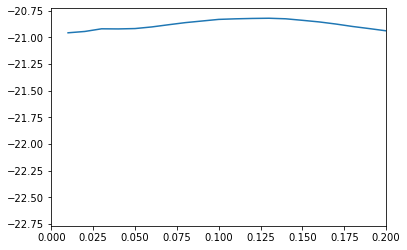

In [96]:
# Let's see the error at multiple values of alpha
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lmlasso=Lasso(alpha=i/100)
    error.append((cross_val_score(lmlasso,X_train,y_train,scoring="neg_mean_absolute_error",cv=4).mean()))
plt.plot(alpha,error)
plt.xlim((0.0,0.2))


In [97]:
# Let's find the alpha value that has the least error 
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=["alpha","error"])
df_err[df_err["error"]==df_err["error"].max()]

,alpha,error
12,0.13,-20.81969


In [98]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
# Cross validation score
print(cross_val_score(rf,X_train,y_train,scoring="neg_mean_absolute_error",cv=4).mean())

-16.27223021582734


In [122]:
# Tuning Random Forest model with GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = parameters = {"n_estimators":range(10,300,10),"criterion":('mse', 'mae'), "max_features":("sqrt","auto","log2")}
GS_rf = GridSearchCV(estimator=rf, param_grid=param_grid,scoring="neg_mean_absolute_error", cv= 4)
GS_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('sqrt', 'auto', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [123]:
# Finding best parameters
GS_rf.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 230}

In [124]:
# Fitting new 
rcf=RandomForestRegressor(n_estimators=230,max_features="sqrt",criterion="mse")
rcf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=230)

In [125]:
print(cross_val_score(rcf,X_train,y_train,scoring="neg_mean_absolute_error",cv=4).mean())

-15.74726696903347


In [128]:
#GridSearch tuned model
prediction=rcf.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prediction,squared=False)

19.96396605185821

In [121]:
# Let's use root mean squared error to evaluate because it will keep the y unit the same.
rc_pred=rf.predict(X_test)
mean_absolute_error(y_test,rc_pred)

12.07266129032258

Using Random Forest and Tuning it with GridSearch, I was able to get a root_mean_absolute error score of 12.07 meaning that my predictions is off the actual values of salaries by 12K which I think is pretty reasonable. 